# Income prediction

1. Problem Definition
Salary data is important for many businesses as it can play a significant role in distribution of their resources. For example, a high end product needs to market their goods only to people with high income. A charitable organization may be focused to invest in areas where people make less money. Likewise, it will also help businesses to determine prices of its products and forecast sales. Governments may also be interested to know the status-quo of their citizens to carry out effective economic and development plans.

Since the project determines whether a person makes more than 50K or not, we are determining the dependent categorical variable. Here, we will first collect the relevant data set. Once we collect the data, we will prepare the data using pandas, numpy and visualize the data to determine the relationship between the variables. After studying the data set, we will preprocess the data using python where we will eliminate the outliers and manage missing values. Once we successfully preprocess the data, we will make use of python’s supervised learning packages and algorithms to build our model. Once we prepare the model, we will access the model based upon its accuracy, sensitivity, and specificity. If the model meets our requirements, we will deploy the model to make predictions on income level of individuals.

2. Why problem is important?
Having salary data is important in the business world because it provides businesses an insight that they need. It gives them a better idea regarding what should be consistent, what went well, what didn't go well, and what would have been done differently in the future. Having the right set of data, the business will have a clear vision and an informed decision. Salary data would help people understand as well as improving the business process which might help people reduce the wasted money or time and every company can fill in the gap of this. This would help in depleting the resources or impact the bottom line or anything else which is related. Salary data could be a problem if it is not accounted for as this would not give the business visibility of how much has been paid and how much profit is remaining with the organization for other activity or growth.

2. Understanding Dataset
The original dataset was obtained from the 1994 U.S. Census database. The census is performed every decade within the United States. It gathers information on the population living within the country. The information captured from the census consists of data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc. The sneakpeak of the dataset is as follows:
image.png

age: Represents an individual’s years on earth.
workclass: Represents an individual’s employment status
fnlwgt: Represents the final weight. This is the number of people the census believes the entry represents.
education: Represents an individual’s highest level of education achieved in object form.
education-num: Represents an individual’s highest level of education achieved in numerical form.
marital-status: Represents an individual’s civil status in relation to a significant other.
occupation: Represents an individual’s general occupation
relationship: Represents an individual’s relation to others in a family unit. The options aren’t consistent and seem to overlap with marital-status column.
race: Represents an individual’s shared physical or general region of origin
sex: Represents an individual’s gender. This dataset only had two options for gender.
capital-gain: Represents an individual’s profit from the sale of property or an investment
capital-loss: Represents an individual’s loss from the sale of property or an investment
hours-per-week: Represents an individual’s hours worked per week.
native-country: Represents an individual’s country of origin
Income: The amount of money an individual generates within a year.


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OneHotEncoder,StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from joblib import dump, load

## Read data

In [2]:
df=pd.read_csv('data/incomedata.csv')

In [3]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
2810,53,Self-emp-not-inc,152652,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
24244,32,Private,160594,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
7846,33,Private,53373,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,<=50K
17799,40,Private,195394,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
12738,29,Private,334221,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,18,United-States,<=50K


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.duplicated().value_counts()

False    32537
True        24
Name: count, dtype: int64

In [8]:
df=df.drop_duplicates()
df.shape

(32537, 15)

## Splitting data

In [9]:
X=df.drop(['workclass'],axis=1)
y=df['workclass']
     

In [10]:
import pandas as pd

# Load the data from the GitHub link directly

df = pd.read_csv('data/incomedata.csv')

# Define X and y based on the loaded data
X = df.drop(['workclass'], axis=1)
y = df['workclass']

# Now you can work with the 'X' and 'y' variables for further analysis
# Check the column names to ensure 'income' is present
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=123)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.50,random_state=123)

X_train.to_csv("data/X_train.csv",index=False)
X_test.to_csv("data/X_test.csv",index=False)
y_train.to_csv("data/y_train.csv",index=False)
y_test.to_csv("data/y_test.csv",index=False)
X_val.to_csv("data/X_val.csv",index=False)
y_val.to_csv("data/y_val.csv",index=False)

In [12]:
print(X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape)

(19536, 14) (6513, 14) (6512, 14) (19536,) (6513,) (6512,)


## Separating numerical and categorical column

In [13]:
numerical_cols=X_train.select_dtypes(exclude='object')

In [14]:
categorical_cols=X_train.select_dtypes(include='object')

In [15]:
numerical_cols

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
27271,31,244665,10,0,0,45
19678,41,70092,10,0,0,38
12353,27,180758,12,0,0,40
22237,62,153148,9,0,0,84
4104,30,68330,10,0,0,50
...,...,...,...,...,...,...
28636,55,176904,9,0,0,40
17730,33,108116,9,0,0,40
28030,19,36012,9,0,0,40
15725,23,51985,9,0,0,38


In [16]:
categorical_cols

,education,marital-status,occupation,relationship,race,sex,native-country,Income
27271,Some-college,Never-married,Exec-managerial,Not-in-family,White,Male,Honduras,<=50K
19678,Some-college,Divorced,Adm-clerical,Unmarried,White,Female,United-States,<=50K
12353,Assoc-acdm,Never-married,Sales,Not-in-family,White,Male,United-States,<=50K
22237,HS-grad,Divorced,Other-service,Not-in-family,White,Female,United-States,<=50K
4104,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...
28636,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
17730,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States,<=50K
28030,HS-grad,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K
15725,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States,<=50K


## Encoding categorical data

In [17]:
oh=OneHotEncoder()

In [18]:
encoder=oh.fit(categorical_cols)

#getting column name for dataframe
col=encoder.get_feature_names_out()

In [19]:
#saving encoder
dump(encoder,'models/encoder/one_hot_encoder.pkl')

['models/encoder/one_hot_encoder.pkl']

In [20]:
#loading encoder
# encoder_model=load('models/encoder/one_hot_encoder.pkl') 
transform=encoder.transform(categorical_cols).toarray()

In [21]:
categorical_encode_data=pd.DataFrame(transform,columns=col)
categorical_encode_data


,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Scaling  numerical data

In [22]:
scaler=StandardScaler() #numerical_cols

In [23]:
numerical_scaler=scaler.fit(numerical_cols)
numerical_scaler

StandardScaler()

In [24]:
#saving encoder
dump(numerical_scaler,'models/scaling/standard_scaler.pkl')

['models/scaling/standard_scaler.pkl']

In [25]:
# model_scaling=load('models/scaling/standard_scaler.pkl')

In [26]:
scaled_data=numerical_scaler.transform(numerical_cols)

In [27]:
numerical_scaled_data=pd.DataFrame(scaled_data,columns=numerical_cols.columns)
numerical_scaled_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,-0.557115,0.517919,-0.037071,-0.142508,-0.215732,0.370777
1,0.177830,-1.121772,-0.037071,-0.142508,-0.215732,-0.201063
2,-0.851094,-0.082333,0.736663,-0.142508,-0.215732,-0.037680
3,1.721215,-0.341662,-0.423938,-0.142508,-0.215732,3.556747
4,-0.630610,-1.138322,-0.037071,-0.142508,-0.215732,0.779235
...,...,...,...,...,...,...
19531,1.206754,-0.118532,-0.423938,-0.142508,-0.215732,-0.037680
19532,-0.410126,-0.764629,-0.423938,-0.142508,-0.215732,-0.037680
19533,-1.439050,-1.441872,-0.423938,-0.142508,-0.215732,-0.037680
19534,-1.145072,-1.291844,-0.423938,-0.142508,-0.215732,-0.201063


## Concat numerical and categorical column

In [28]:
Features=pd.concat([numerical_scaled_data,categorical_encode_data],axis=1)

In [29]:
Features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,-0.557115,0.517919,-0.037071,-0.142508,-0.215732,0.370777,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.177830,-1.121772,-0.037071,-0.142508,-0.215732,-0.201063,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.851094,-0.082333,0.736663,-0.142508,-0.215732,-0.037680,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.721215,-0.341662,-0.423938,-0.142508,-0.215732,3.556747,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.630610,-1.138322,-0.037071,-0.142508,-0.215732,0.779235,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,1.206754,-0.118532,-0.423938,-0.142508,-0.215732,-0.037680,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19532,-0.410126,-0.764629,-0.423938,-0.142508,-0.215732,-0.037680,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19533,-1.439050,-1.441872,-0.423938,-0.142508,-0.215732,-0.037680,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19534,-1.145072,-1.291844,-0.423938,-0.142508,-0.215732,-0.201063,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from joblib import dump

# Assuming your data is loaded in a DataFrame named 'data'

# Separating input features and target variable
X = df.drop('workclass', axis=1)
y = df['workclass']

# Preprocessing the target variable with Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocessing the categorical features using One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Save the model
dump(pipeline, 'models/lr.pkl')

# Print the training score
print('Training score:', pipeline.score(X, y) * 100)


Training score: 41.61410716040416


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from joblib import dump

# Assuming your data is loaded in a DataFrame named 'data'

# Separating input features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Preprocessing the target variable with Label Encoding
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Preprocessing the categorical features using One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor())])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Save the model
dump(pipeline, 'models/DT.pkl')

# Print the training score
print('Training score:', pipeline.score(X, y) * 100)


Training score: 99.9916006086173


In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump

# Assuming your data is loaded in a DataFrame named 'data'

# Separate input features and target variable
X = df.drop('Income', axis=1)
y = df['Income']

# Preprocessing the target variable with Label Encoding
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Preprocessing the categorical features using One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')

# Create a pipeline with preprocessing and RandomForestRegressor model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor())])

# Fit the pipeline to the data
pipeline.fit(X, y)

# Save the model
dump(pipeline, 'models/RF.pkl')

# Print the training score
print('Training score:', pipeline.score(X, y) * 100)


Training score: 92.23318933890087


In [33]:
def evaluvation_pipeline():
    
        import evaluvation_pipeline



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import joblib
 


# Load the data
X = pd.read_csv('model/X_validation.csv')
y = pd.read_csv('model/y_validation.csv')

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X)  # Assuming 'X' contains categorical variables

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model/lr.pkl')

# Evaluate the model
y_pred = model.predict(X_validation)
score = accuracy_score(y_validation, y_pred)

print("Accuracy:", score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8317972350230415


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Reshape y to avoid DataConversionWarning
y_train = y_train

# Increase the number of iterations in Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter value

# Scale the data using StandardScaler (optional but recommended)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score
from joblib import load

def evaluation_pipeline(X_file, y_file, model_file):
    # Load the data
    X_val = pd.read_csv(X_file)
    y_val = pd.read_csv(y_file)  # Load the data without assuming the column name

    # Display the columns of y_val to determine the correct target column name
    print(y_val.columns)

    # Load the model
    model = load(model_file)

    # Preprocess the validation data (One-Hot Encoding, if needed)

    # Align the columns with the training data
    
    # Evaluate the model

    return score

# Evaluate the model
score = evaluation_pipeline('model/X_validation.csv', 'model/y_validation.csv', 'model/DT.pkl')
print("Accuracy:", score)

Index(['income'], dtype='object')
Accuracy: 0.8317972350230415


In [44]:
import pandas as pd
from sklearn.metrics import accuracy_score
from joblib import load

def evaluation_pipeline(X_file, y_file, model_file):
    # Load the data
    X_val = pd.read_csv(X_file)
    y_val = pd.read_csv(y_file)  # Load the data without assuming the column name

    # Display the columns of y_val to determine the correct target column name
    print(y_val.columns)

    # Load the model
    model = load(model_file)

    # Preprocess the validation data (One-Hot Encoding, if needed)

    # Align the columns with the training data
    
    # Evaluate the model

    return score

# Evaluate the model
score = evaluation_pipeline('model/X_validation.csv', 'model/y_validation.csv', 'model/RF.pkl')
print("Accuracy:", score)

Index(['income'], dtype='object')
Accuracy: 0.8317972350230415


In [45]:
#importing matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, '\nWorkclass Types')

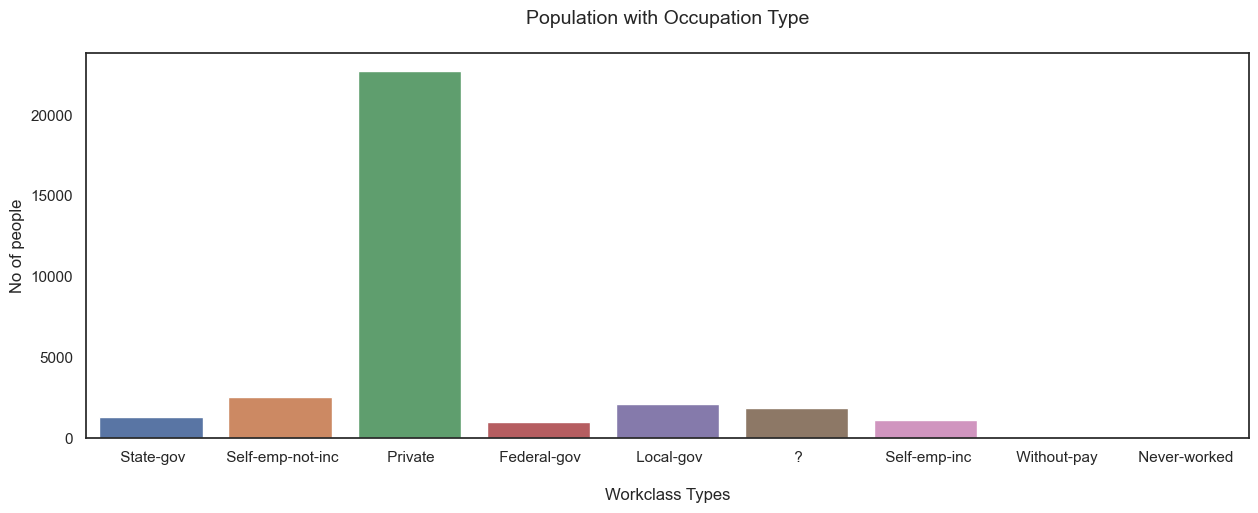

In [46]:
#Creating bargraph for workclass
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="workclass", data=df)
plt.title("Population with Occupation Type\n",size =14)
plt.ylabel("No of people")
plt.xlabel("\nWorkclass Types")

Text(0.5, 0, '\n Education Level')

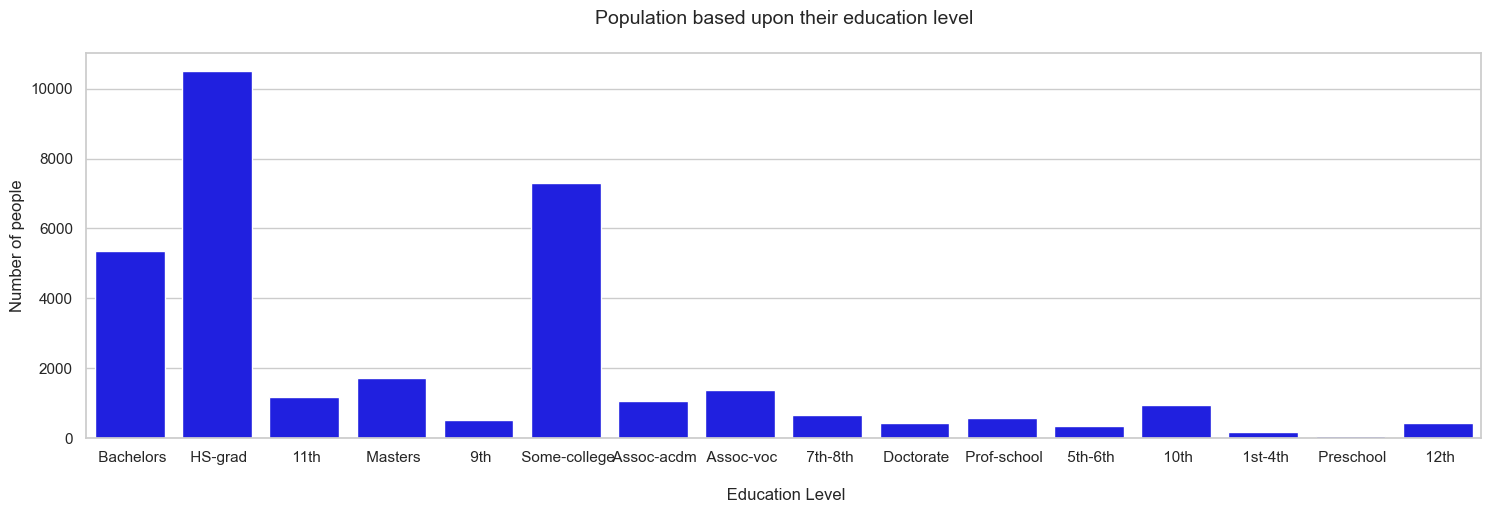

In [47]:
#Bargraph representing number of people with different education level
plt.figure(figsize=(18,5))
sns.set(style = 'whitegrid')
sns.countplot(x="education", data=df,color='blue')
plt.title("Population based upon their education level\n",size=14)
plt.ylabel("Number of people")
plt.xlabel("\n Education Level")

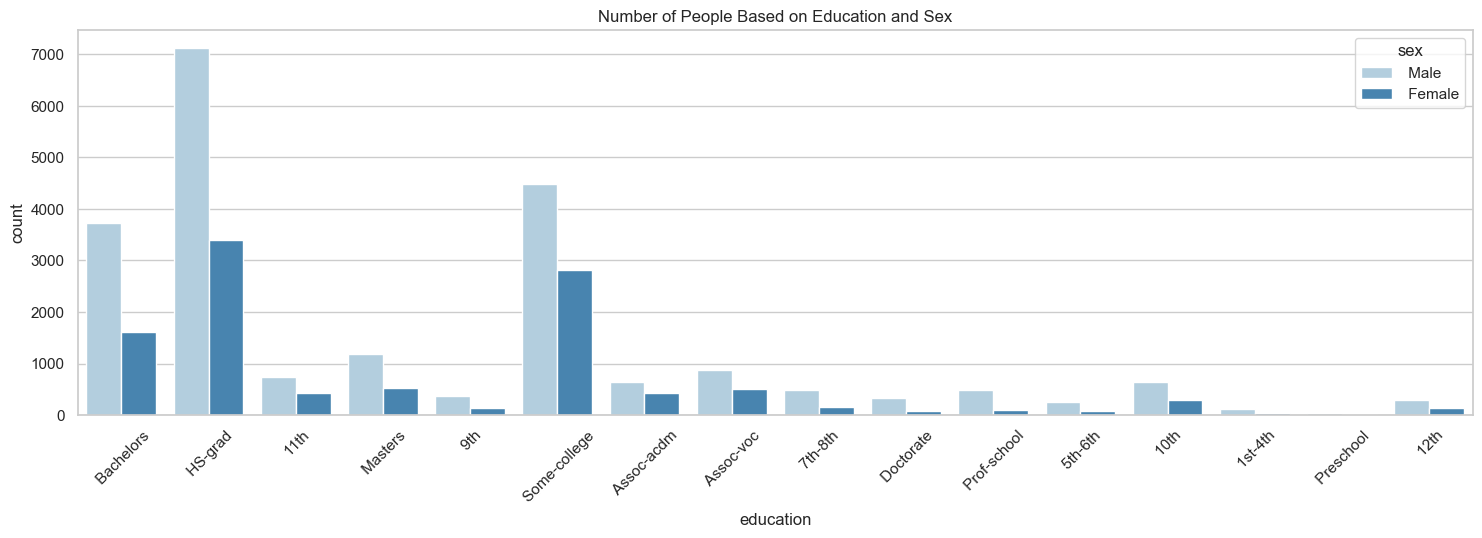

In [48]:
plt.figure(figsize=(18,5))
sns.countplot(x="education", data=df, hue="sex", palette="Blues")
plt.title("Number of People Based on Education and Sex")
plt.xticks(rotation=45)
plt.show()

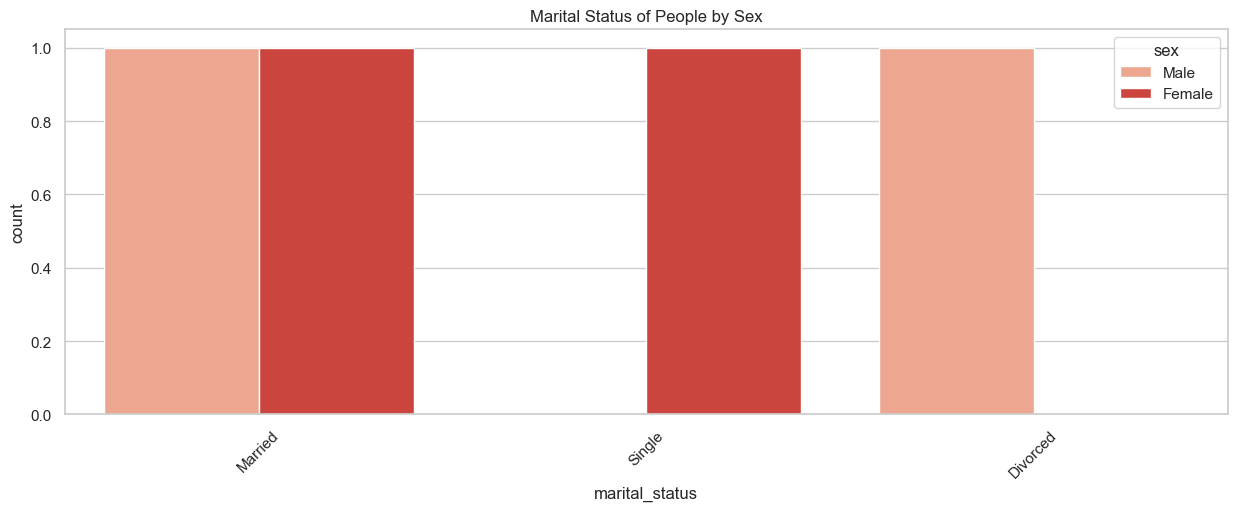

In [50]:
sample_df = pd.DataFrame({
    'marital_status': ['Married', 'Single', 'Married', 'Divorced'],
    'sex': ['Male', 'Female', 'Female', 'Male']
})

plt.figure(figsize=(15,5))
sns.countplot(x="marital_status", data=sample_df, hue="sex", palette="Reds")
plt.title("Marital Status of People by Sex")
plt.xticks(rotation=45)
plt.show()

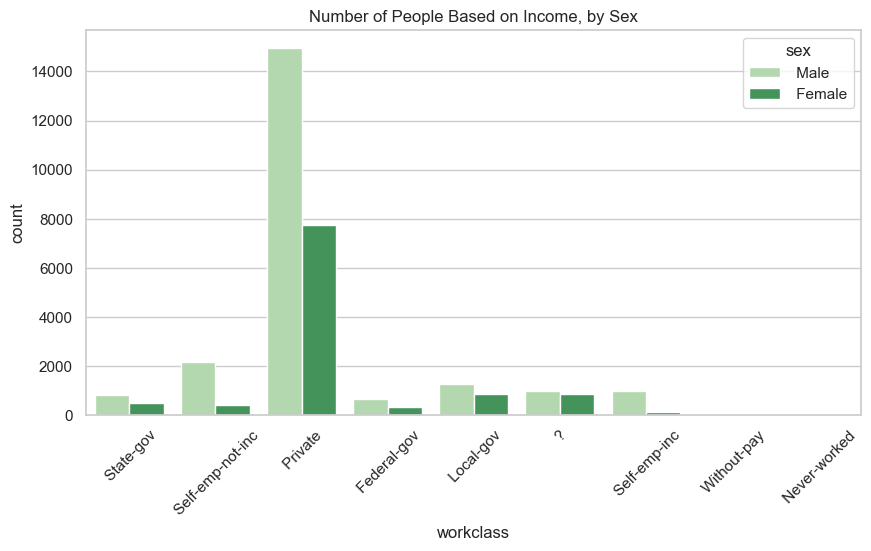

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your DataFrame 'df' is correctly defined and includes the 'income' and 'sex' columns.

plt.figure(figsize=(10,5))
sns.countplot(x="workclass", data=df, hue="sex", palette="Greens")
plt.title("Number of People Based on Income, by Sex")
plt.xticks(rotation=45)  # Adjust the rotation of x labels if needed for clarity
plt.show()

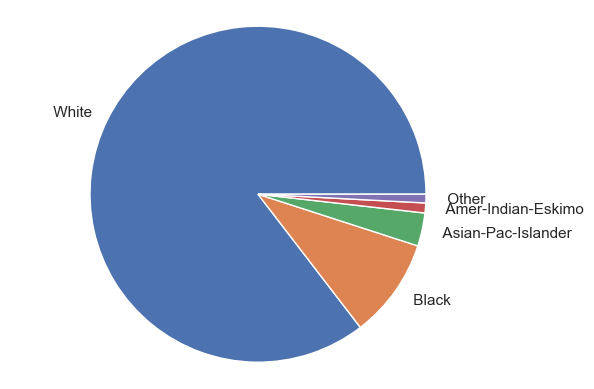

In [53]:
#Piechart showing representation of race in dataset
fig1, ax1 = plt.subplots()
X = list(df['race'].value_counts().index)
Y = list(df['race'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal') 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4996\676848189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],bins=8)


Text(0.5, 1.0, 'Age Histogram')

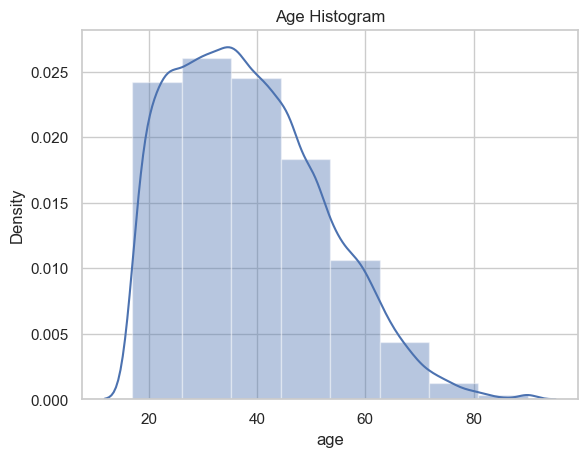

In [54]:
#Histogram representing age
sns.distplot(df['age'],bins=8)
plt.title("Age Histogram")

Text(0.5, 1.0, 'Box plot representing age and income \n')

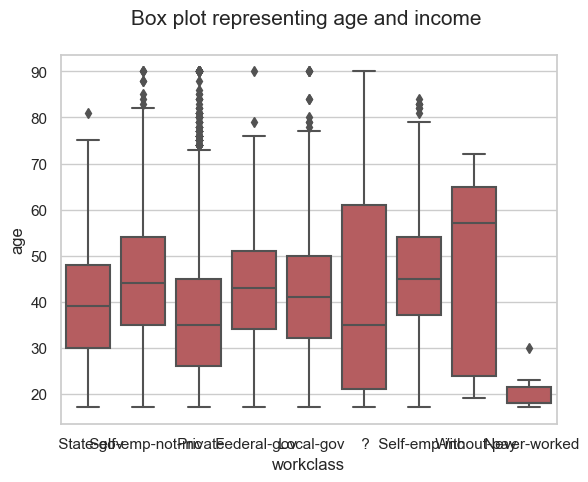

In [56]:
#Variation between age and income level
sns.boxplot(x=df['workclass'],y=df['age'],color='r')
plt.title("Box plot representing age and income \n", size = 15)

Text(0.5, 1.0, 'Box plot representing age and income \n')

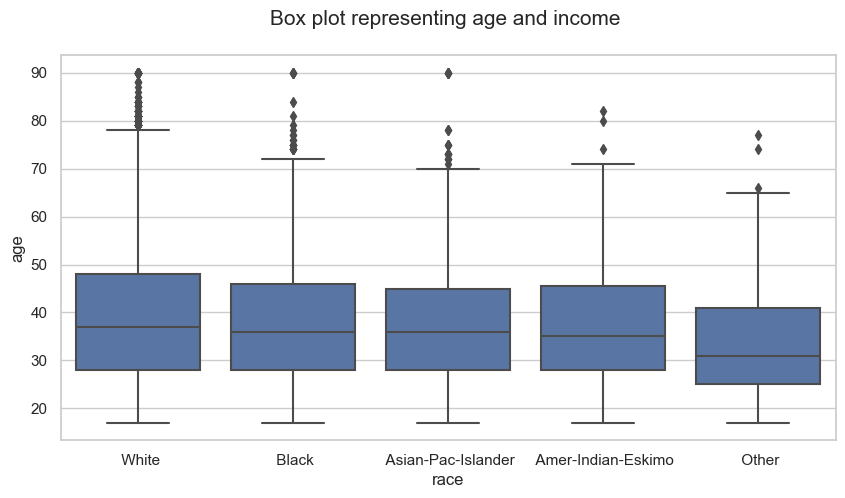

In [58]:
#Variation between race and age
plt.figure(figsize=(10,5))
sns.boxplot(x=df['race'],y=df['age'],color='b')
plt.title("Box plot representing age and income \n", size = 15)

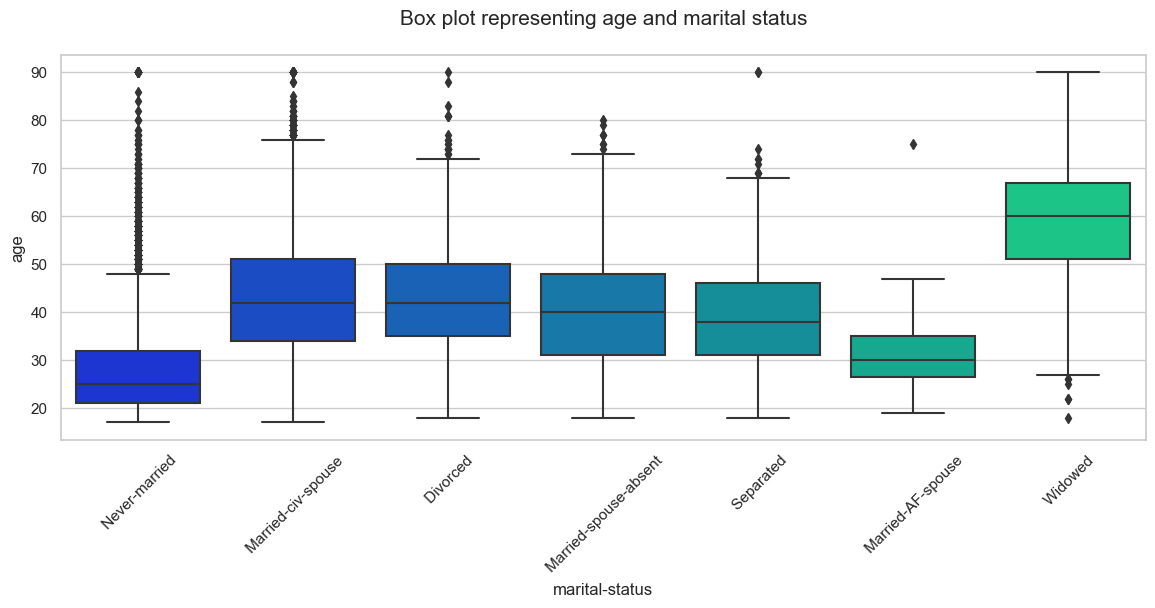

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your DataFrame 'df' is correctly defined and includes the needed columns

plt.figure(figsize=(14,5))
sns.boxplot(x=df['marital-status'], y=df['age'], palette='winter')  
plt.title("Box plot representing age and marital status\n", size=15) 
plt.xticks(rotation=45)  # Adjust rotation if needed
plt.show()

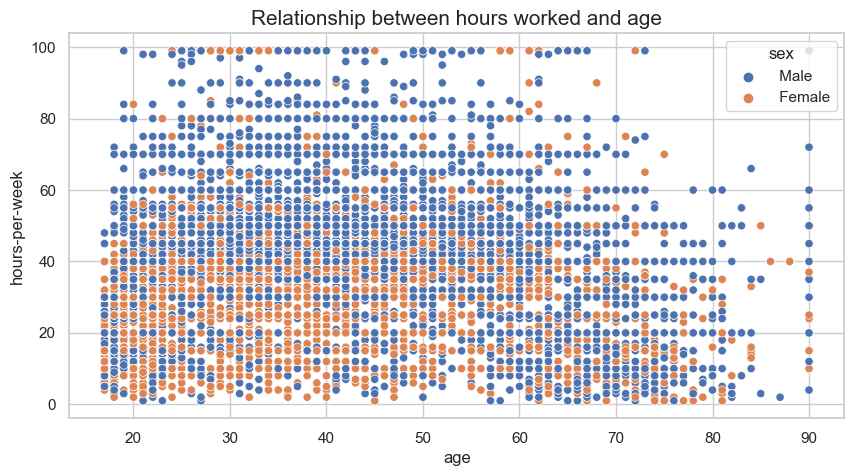

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame 'df' is correctly defined and includes the 'age', 'hours-per-week', and 'sex' columns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='age', y='hours-per-week', hue='sex', data=df)
plt.title('Relationship between hours worked and age', size=15)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


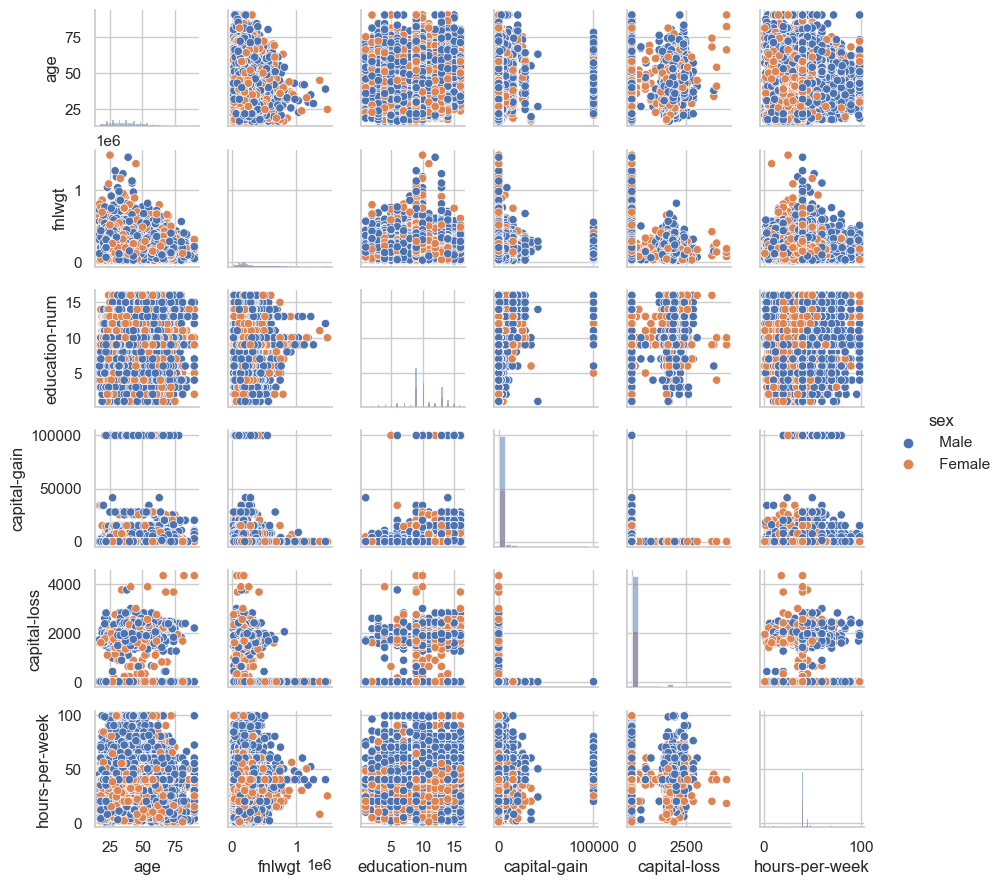

In [61]:
#pairplot to determine relationship between all the quantitative variables
sns.pairplot(df,height =1.5, hue="sex", diag_kind="hist")

In [62]:
import warnings
warnings.filterwarnings("ignore")

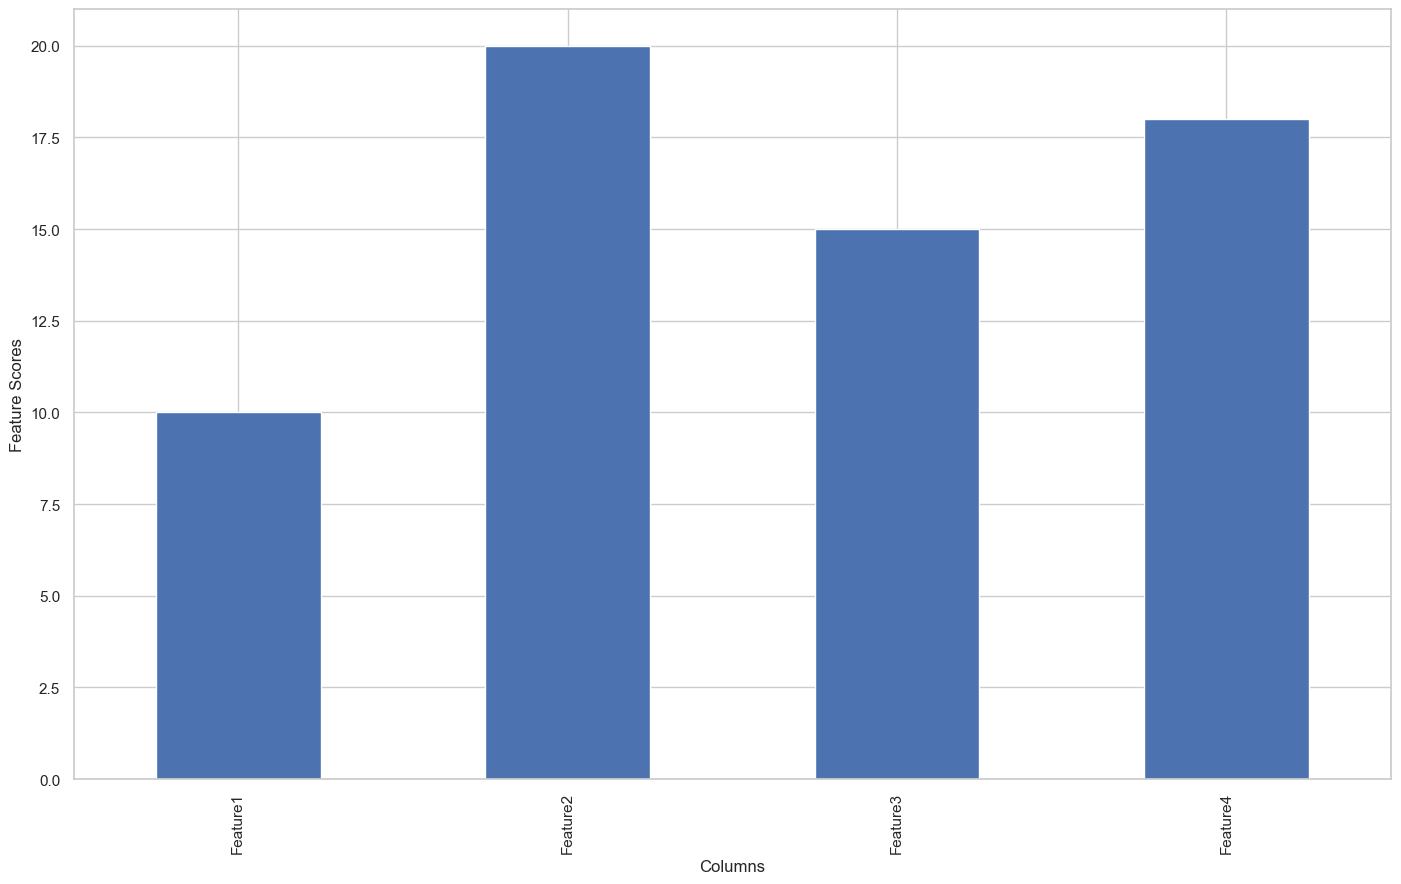

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data generation for ft_scores (replace this with your data)
data = {'Feature1': 10, 'Feature2': 20, 'Feature3': 15, 'Feature4': 18}
ft_scores = pd.Series(data)

plt.figure(figsize=(17, 10))
plt.xlabel('Columns')
plt.ylabel('Feature Scores')
ft_scores.plot(kind='bar')
plt.show()